### Importações

In [23]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline


### Funções utilizadas

Foram criadas as funções que foram utilizadas durante a questão 3 do trabalho prático

In [164]:
#Função Seno
def fsin_x(x):
    return np.sin(x)

#Função que gera cada valor de yi para questão
def generate_yi(x, p, q):
    #condi é um vetor com o valor de len == len x em cada posição tem 0 a 1 pertencimento a classe A
    y = np.array([(i * p + q) for i in x])
    return y

#Função que gera o tipo de sinal u 
def generate_sign_type(x, tri, sign_type, sigma = 0.5):
    if sign_type == 'tri':
        sign = fuzz.trimf(x, tri)
    elif sign_type == 'gauss':
        sign = fuzz.gaussmf(x, tri[1], sigma)
    
    return sign

#Gera o sinal u
def generate_ui(x, stt, fnl, sp, dist, sign_type = 'tri',const = 1, direc = 'right'):
    
    if direc == 'right':
        fnl -= dist
        trianf = [fnl-sp, fnl, fnl+sp]
        sign = generate_sign_type(x, trianf, sign_type)
        
    elif direc == 'left':
        stt += dist
        triani = [stt-sp, stt, stt+sp] 
        sign = generate_sign_type(x, triani, sign_type)
    else:
        fnl -= dist
        stt += dist
        trianf = [fnl-sp, fnl, fnl+sp]
        triani = [stt-sp, stt, stt+sp]
        sign = generate_sign_type(x, triani, sign_type) + generate_sign_type(x, trianf, sign_type)

    ai_const = x.copy()
    ai_const = np.array([const if i>= stt and i<= fnl else 0 for i in ai_const])
    ui = ai_const + sign
    ui = np.array([const if i>const else i for i in ui])
    return ui

#Utiliza todas as funções e distribuições para gerar a função resultado
def generate_y_final(yi , ui):
    n_samples = len(yi[0])
    n_condi = len(yi)
    Y = []
    
    for n in range(n_samples):
        vp = 0
        norm = 0
        for i in range(n_condi):
            norm += ui[i][n]
            vp += ui[i][n] * yi[i][n]
        
        Y.append(vp/norm)
    return np.array(Y)

#calcula o erro quadrático médio
def MSE(y, y_pred):
    mse = np.mean((y - y_pred)**2)
    return mse

#Plot dos resultados
def plot_result(input_x, y, Y_hat, ui, yi):
    #plt.plot(input_x, label="u1", marker=".")
    for i,u_ in enumerate(ui):
        plt.plot(input_x,u_, label="u"+str(i))
    #for i,u_ in enumerate(yi):
    #    plt.plot(input_x,y1, label="y"+str(i), marker=".")
    plt.plot(input_x,y, label="sin(x)")
    plt.plot(input_x,Y_hat, label="Y", marker=".")
    plt.legend(loc="upper right")
    plt.show()

### Questão 3

- Foram gerados alguns parametros referentes ao angulo das distribuições, distancia entre cada distribuição, e inicio e fim de cada distribuição. 

Esses parâmetros foram utilizados para gerar os sinais apresentados nas figuras no fim da próxima célula. Pode-se ver o erro minimiza com a utilização da função gaussiana, em detrimento da função triangular para a fuzzificação. Esse resultado era esperado, visto que o fato da função seno ter um amortecimento nos limites proporcionam uma característica parecida com a gaussiana.


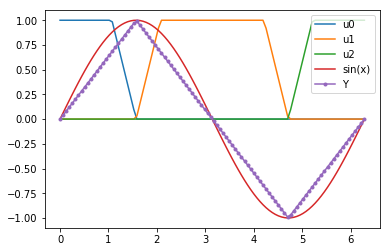

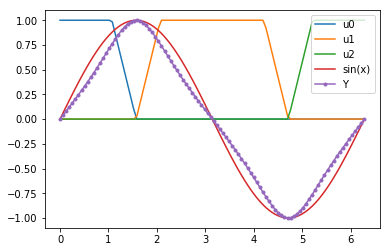

Erro medio quadratico Aproximação Triangular: 0.02254
Erro medio quadratico Aproximação Gaussiana: 0.01318


In [165]:
#generate input 0 a 2pi
lim1 = 0
lim2 = 2 * np.pi
step = 100
input_x = np.linspace(lim1, lim2, step)
#generate result real
sin_x = fsin_x(input_x) 

#generate ui
#valores de determinada classe Fuzzy
angle = 0.5
dist = angle
start1, final1 = 0, np.pi/2
start2, final2 = np.pi/2, 3*np.pi/2
start3, final3 = 3*np.pi/2, 2*np.pi

u1 = generate_ui(input_x.copy(), start1, final1, angle, dist, sign_type = 'tri', const = 1, direc = 'right')
u2 = generate_ui(input_x.copy(), start2, final2, angle, dist, sign_type = 'tri', const = 1, direc = 'both')
u3 = generate_ui(input_x.copy(), start3, final3, angle, dist, sign_type = 'tri', const = 1, direc = 'left')
ui_tri = [u1,u2,u3]

u1 = generate_ui(input_x.copy(), start1, final1, angle, dist, sign_type = 'gauss', const = 1, direc = 'right')
u2 = generate_ui(input_x.copy(), start2, final2, angle, dist, sign_type = 'gauss', const = 1, direc = 'both')
u3 = generate_ui(input_x.copy(), start3, final3, angle, dist, sign_type = 'gauss', const = 1, direc = 'left')
ui_gauss = [u1,u2,u3]

#generate yi valores de p e q obtidos com a analise
p1, q1 = 2/np.pi, 0
p2, q2 = -2/np.pi, 2
p3, q3 = 2/np.pi, -4

y1 = generate_yi(input_x.copy(), p1, q1)
y2 = generate_yi(input_x.copy(), p2, q2)
y3 = generate_yi(input_x.copy(), p3, q3)
yi = [y1,y2,y3]

#generate final
Y_tri = generate_y_final(yi , ui_tri)
Y_gauss = generate_y_final(yi , ui_gauss)
mse_tri = MSE(sin_x,Y_tri)
mse_gauss = MSE(sin_x,Y_gauss)

plot_result(input_x, sin_x, Y_tri, ui_tri, yi)
plot_result(input_x, sin_x, Y_gauss, ui_tri, yi)

print('Erro medio quadratico Aproximação Triangular: {:.5f}'.format(mse_tri))
print('Erro medio quadratico Aproximação Gaussiana: {:.5f}'.format(mse_gauss))



#### Execução com 5 condições

- Foram selecionados os limites para terem mais duas condições. Nesse caso, perto dos valores da função em 1 e -1, teriam 2 condições. Um candição seria uma reta subindo e outra condição uma reta descendo.

Dessa maneira, como esperado, a aproximação fica ainda melhor. Pois as retas podem ter uma inclinação específica para cada parte.

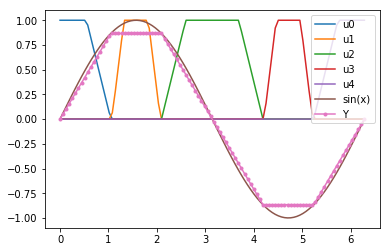

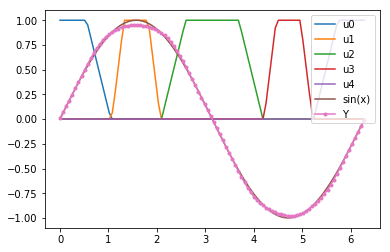

Erro medio quadratico Aproximação Triangular: 0.00473
Erro medio quadratico Aproximação Gaussiana: 0.00038


In [166]:
#5
#generate input 0 a 2pi
lim1 = 0
lim2 = 2 * np.pi
step = 100
input_x = np.linspace(lim1, lim2, step)
#generate result real
sin_x = fsin_x(input_x) 

#generate ui
#valores de determinada classe Fuzzy
angle = 0.5
dist = angle
start1, final1 = 0, np.pi/3
start2, final2 = np.pi/3, 2*np.pi/3
start3, final3 = 2*np.pi/3, 4*np.pi/3
start4, final4 = 4*np.pi/3, 5*np.pi/3
start5, final5 = 5*np.pi/3, 2*np.pi

u1 = generate_ui(input_x.copy(), start1, final1, angle, dist, sign_type = 'tri', const = 1, direc = 'right')
u2 = generate_ui(input_x.copy(), start2, final2, angle, dist, sign_type = 'tri', const = 1, direc = 'both')
u3 = generate_ui(input_x.copy(), start3, final3, angle, dist, sign_type = 'tri', const = 1, direc = 'both')
u4 = generate_ui(input_x.copy(), start4, final4, angle, dist, sign_type = 'tri', const = 1, direc = 'both')
u5 = generate_ui(input_x.copy(), start5, final5, angle, dist, sign_type = 'tri', const = 1, direc = 'left')
ui_tri = [u1,u2,u3,u4,u5]

u1 = generate_ui(input_x.copy(), start1, final1, angle, dist, sign_type = 'gauss', const = 1, direc = 'right')
u2 = generate_ui(input_x.copy(), start2, final2, angle, dist, sign_type = 'gauss', const = 1, direc = 'both')
u3 = generate_ui(input_x.copy(), start3, final3, angle, dist, sign_type = 'gauss', const = 1, direc = 'both')
u4 = generate_ui(input_x.copy(), start4, final4, angle, dist, sign_type = 'gauss', const = 1, direc = 'both')
u5 = generate_ui(input_x.copy(), start5, final5, angle, dist, sign_type = 'gauss', const = 1, direc = 'both')
ui_gauss = [u1,u2,u3,u4,u5]

#generate yi valores de p e q obtidos com a analise
p1, q1 = 2.598/np.pi, 0
p2, q2 = 0, 0.866
p3, q3 = -2.598/np.pi, 2.598
p4, q4 = 0, -0.866
p5, q5 = 2.598/np.pi, -5.196

y1 = generate_yi(input_x.copy(), p1, q1)
y2 = generate_yi(input_x.copy(), p2, q2)
y3 = generate_yi(input_x.copy(), p3, q3)
y4 = generate_yi(input_x.copy(), p4, q4)
y5 = generate_yi(input_x.copy(), p5, q5)
yi = [y1,y2,y3,y4,y5]

#generate final
Y_tri = generate_y_final(yi , ui_tri)
Y_gauss = generate_y_final(yi , ui_gauss)
mse_tri = MSE(sin_x,Y_tri)
mse_gauss = MSE(sin_x,Y_gauss)

plot_result(input_x, sin_x, Y_tri, ui_tri, yi)
plot_result(input_x, sin_x, Y_gauss, ui_tri, yi)

print('Erro medio quadratico Aproximação Triangular: {:.5f}'.format(mse_tri))
print('Erro medio quadratico Aproximação Gaussiana: {:.5f}'.format(mse_gauss))


#### Execução com 10 condições

- Seguindo a mesma ideia de 5 condições, foram postos mais retas em partes que possuiam determinada curva.

Percebe-se uma aproximação melhor ainda. 

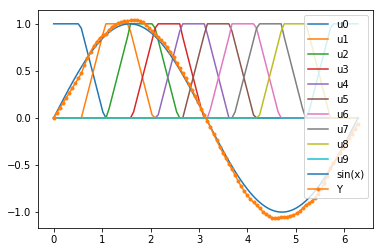

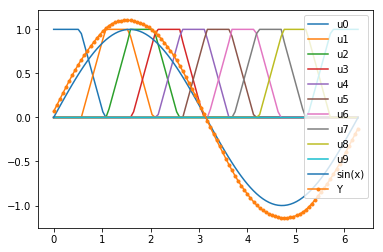

Erro medio quadratico Aproximação Triangular: 0.00188
Erro medio quadratico Aproximação Gaussiana: 0.01324


In [167]:
#10

#generate input 0 a 2pi
lim1 = 0
lim2 = 2 * np.pi
step = 100
input_x = np.linspace(lim1, lim2, step)
#generate result real
sin_x = fsin_x(input_x) 

#generate ui
#valores de determinada classe Fuzzy
angle = 0.5
dist = angle
start1, final1 = 0, np.pi/3
start2, final2 = np.pi/3, np.pi/2
start3, final3 = np.pi/2, 2*np.pi/3
start4, final4 = 2*np.pi/3, 5*np.pi/6
start5, final5 = 5*np.pi/6, np.pi
start6, final6 = np.pi, 7*np.pi/6
start7, final7 = 7*np.pi/6, 4*np.pi/3
start8, final8 = 4*np.pi/3, 3*np.pi/2
start9, final9 = 3*np.pi/2, 5*np.pi/3 
start10, final10 = 5*np.pi/3, 2*np.pi

limt = [0, np.pi/3, np.pi/2, 2*np.pi/3, 5*np.pi/6, np.pi, 7*np.pi/6, 4*np.pi/3, 3*np.pi/2, 5*np.pi/3, 2*np.pi]
ui_tri = []
ui_gauss = []
for i in range(len(limt)-1):
    start1 = limt[i]
    final1 = limt[i+1]
    if i==0:
        direc = 'right'
    elif i < len(limt)-2:
        direc = 'both'
    else:
        direc = 'left'
    u_t = generate_ui(input_x.copy(), start1, final1, angle, dist, sign_type = 'tri', const = 1, direc = direc)
    u_g = generate_ui(input_x.copy(), start1, final1, angle, dist, sign_type = 'gauss', const = 1, direc = direc)
    ui_tri.append(u_t)
    ui_gauss.append(u_g)


    
#generate yi valores de p e q obtidos com a analise
p1, q1 = 2.598/np.pi, 0
p2, q2 = 0.256, 0.62
p3, q3 = -0.256, 1.45
p4, q4 = -2/np.pi, 2.196
p5, q5 = -3/np.pi, 3
p6, q6 = -3/np.pi, 3
p7, q7 = -2.196/np.pi, 2
p8, q8 = -0.256, 0.15
p9, q9 = 0.256, -2.256
p10, q10 = 2.598/np.pi, -5.256

y1 = generate_yi(input_x.copy(), p1, q1)
y2 = generate_yi(input_x.copy(), p2, q2)
y3 = generate_yi(input_x.copy(), p3, q3)
y4 = generate_yi(input_x.copy(), p4, q4)
y5 = generate_yi(input_x.copy(), p5, q5)
y6 = generate_yi(input_x.copy(), p6, q6)
y7 = generate_yi(input_x.copy(), p7, q7)
y8 = generate_yi(input_x.copy(), p8, q8)
y9 = generate_yi(input_x.copy(), p9, q9)
y10 = generate_yi(input_x.copy(), p10, q10)
yi = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]

#generate final
Y_tri = generate_y_final(yi , ui_tri)
Y_gauss = generate_y_final(yi , ui_gauss)
mse_tri = MSE(sin_x,Y_tri)
mse_gauss = MSE(sin_x,Y_gauss)

plot_result(input_x, sin_x, Y_tri, ui_tri, yi)
plot_result(input_x, sin_x, Y_gauss, ui_tri, yi)

print('Erro medio quadratico Aproximação Triangular: {:.5f}'.format(mse_tri))
print('Erro medio quadratico Aproximação Gaussiana: {:.5f}'.format(mse_gauss))


### Questão 4

- As funções de comida e serviço foi modelada com função triangular de fuzzificação. Foram utilizados valores de 0 a 10. Além disso, o comportamento das funções e as condições utilizadas estão descrita no código. 

O resultado apresenta um comportamento parecido com o comportamento visto no exemplo, com a excessão que o máximo é 25%, ou seja, qualquer coisa maior que isso é tido como esse valor.

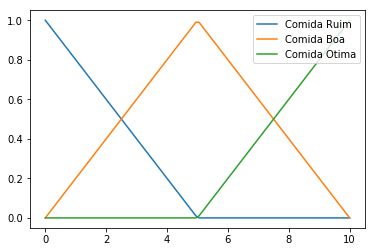

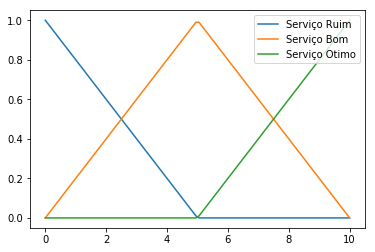

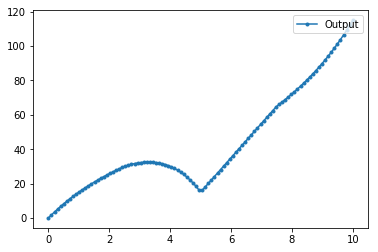

In [172]:
#4 questao

#Input
#comida ruim/otima
#seviço ruim/otimo
comida = np.linspace(0,1,11) #0 a 1
serviço = np.linspace(0,1,11) #0 a 1 
x = np.linspace(0, 10, 100)


#comida ruim
u1 = fuzz.trimf(x, [0,0,5])
#comida boa
u2 = fuzz.trimf(x, [0,5,10])
#comida ótima
u3 = fuzz.trimf(x, [5,10,10])

#Comida
plt.plot(x,u1, label="Comida Ruim")
plt.plot(x,u2, label="Comida Boa")
plt.plot(x,u3, label="Comida Otima")
plt.legend(loc="upper right")
plt.show()


#serviço ruim
u4 = fuzz.trimf(x, [0,0,5])
#serviço bom
u5 = fuzz.trimf(x, [0,5,10])
#serviço ótimo
u6 = fuzz.trimf(x, [5,10,10])


#Comida
plt.plot(x,u4, label="Serviço Ruim")
plt.plot(x,u5, label="Serviço Bom")
plt.plot(x,u6, label="Serviço Otimo")
plt.legend(loc="upper right")
plt.show()


y1 = 15 * x 
y2 = np.array([15]*len(x)) 
y3 = (10 * x) + 15

#condições indicadas pelo trabalho 
u1_f = u1+u4
u2_f = u5
u3_f = u3+u6

u1_f = np.array([1 if i>1 else i for i in u1_f])
u3_f = np.array([1 if i>1 else i for i in u3_f])


yi = [y1,y2,y3]
ui = [u1_f, u2_f, u3_f]


Y = generate_y_final(yi , ui)

plt.plot(x,Y, label="Output", marker=".")
plt.legend(loc="upper right")
plt.show()


